The 2020.03 release includes a set of significant improvements to the RDKit molecule drawing code. If you're interested in the history, the original issue [is here](https://github.com/rdkit/rdkit/issues/2931).

The work for this was done by Dave Cosgrove and it was funded by Medchemica (the changes tracked in that github issue), and T5 Informatics (atom and bond annotations). Many thanks to Al and Ed at Medchemica for the funding and to Dave for doing the work!

As an aside to people in companies that are using the RDKit: this is a good model for how to get specific improvements/additions made to the RDKit. You may not have developers working in your organization, but you can fund a third party to do the work. This approach is most effective when there's some communication with the RDKit development team before starting (that's what Dave did with the ticket above). 

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import rdkit
print(rdkit.__version__)

2020.03.1


Let's start by drawing a molecule using a `MolDraw2DSVG()` object:

In [2]:
diclofenac = Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')

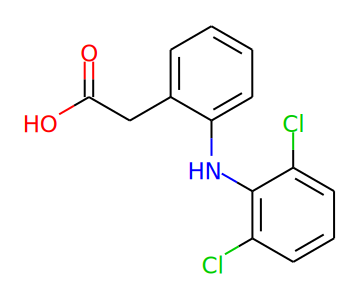

In [3]:
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.DrawMolecule(diclofenac)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

## Atom and bond indices

We can easily add atom indices to the drawing:

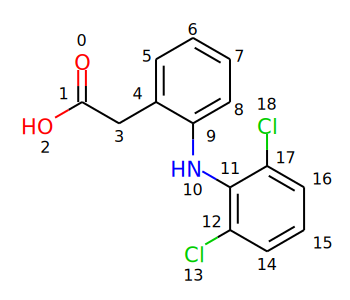

In [4]:
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(diclofenac)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

or bond indices:

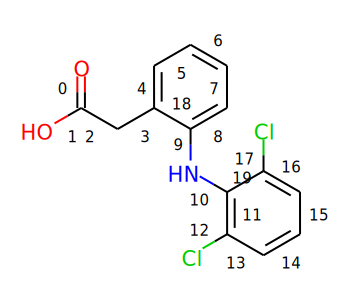

In [5]:
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().addBondIndices=True
d2d.DrawMolecule(diclofenac)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

It's also possible to show both atom and bond indices, but this tends to be a bit crowded.

## Atom and bond annotations

It's also possible to add user-provided annotations to either atoms or bonds by setting atom/bond properties:

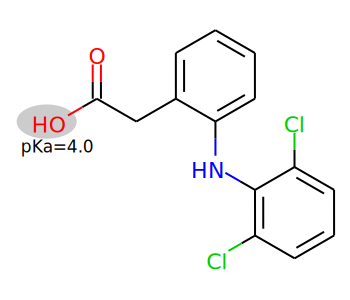

In [6]:
cp = Chem.Mol(diclofenac)
cp.GetAtomWithIdx(2).SetProp("atomNote","pKa=4.0")
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().setHighlightColour((0.8,0.8,0.8))
d2d.DrawMolecule(cp,highlightAtoms=[2])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

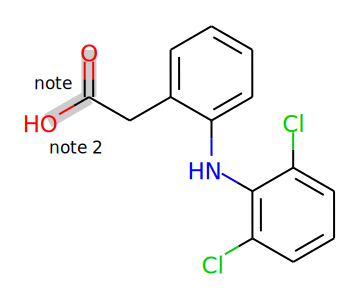

In [7]:
cp = Chem.Mol(diclofenac)
cp.GetBondWithIdx(0).SetProp("bondNote","note")
cp.GetBondWithIdx(1).SetProp("bondNote","note 2")
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().setHighlightColour((0.8,0.8,0.8))
d2d.DrawMolecule(cp,highlightAtoms=[],highlightBonds=[0,1])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

## Stereochemistry

There's a convenience option to show stereochemistry labels.

Let's start with the two enantiomers of threonine:

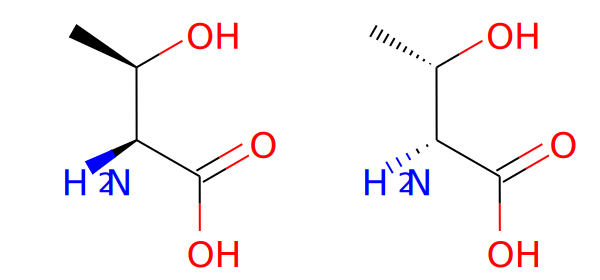

In [8]:
l_threonine = Chem.MolFromSmiles('C[C@@H](O)[C@H](N)C(O)=O')
d_threonine = Chem.MolFromSmiles('C[C@H](O)[C@@H](N)C(O)=O')

d2d = rdMolDraw2D.MolDraw2DSVG(600,280,300,280)
d2d.DrawMolecules([l_threonine,d_threonine])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

It can also be nice to show the absolute stereo labels to the drawing:

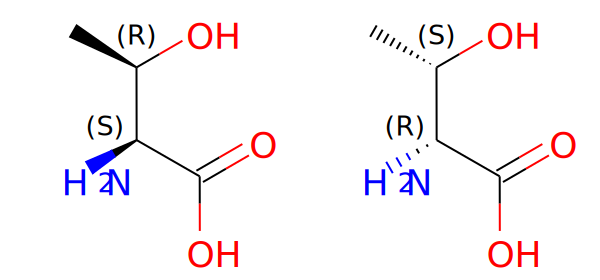

In [9]:
d2d = rdMolDraw2D.MolDraw2DSVG(600,280,300,280)
d2d.drawOptions().addStereoAnnotation=True
d2d.DrawMolecules([l_threonine,d_threonine])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

**Note**: the RDKit code that does CIP assignments (i.e. R/S and E/Z assignment) is not a faithful implementation of the CIP rules, which are [complicated](https://pubs.acs.org/doi/abs/10.1021/acs.jcim.8b00324). The labels are reliable (in the sense that you'll always get the same answer for the same molecule, no matter how it's drawn), but the assignment of atom priorities is only an approximation to the actual CIP rules.

We hope to have a better implementation of true CIP labels in a future release, but definitely take the current labels with a giant grain of salt.

Now let's look allothreonine, the diasteromers of threonine:

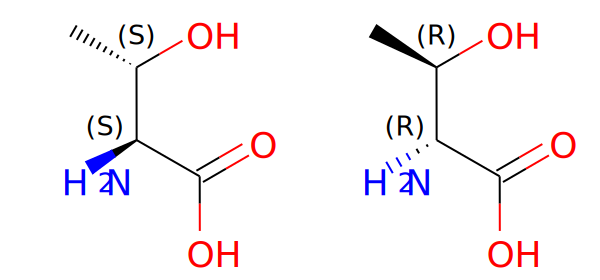

In [10]:
l_allothreonine = Chem.MolFromSmiles('C[C@H](O)[C@H](N)C(O)=O')
d_allothreonine = Chem.MolFromSmiles('C[C@@H](O)[C@@H](N)C(O)=O')
d2d = rdMolDraw2D.MolDraw2DSVG(600,280,300,280)
d2d.drawOptions().addStereoAnnotation=True
d2d.DrawMolecules([l_allothreonine,d_allothreonine])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

## adaptations to different drawing sizes:

I've been using large drawings to make things super clear, but one of the other big improvements is that font scaling now works better:

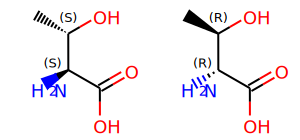

In [11]:
d2d = rdMolDraw2D.MolDraw2DSVG(300,140,150,140)
d2d.drawOptions().addStereoAnnotation=True
d2d.DrawMolecules([l_allothreonine,d_allothreonine])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

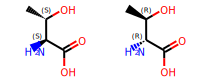

In [12]:
d2d = rdMolDraw2D.MolDraw2DSVG(200,80,100,80)
d2d.drawOptions().addStereoAnnotation=True
d2d.DrawMolecules([l_allothreonine,d_allothreonine])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

If we want the molecule scaling to be insensitive to the size of the drawing surface, we can use the `fixedBondLength` option:

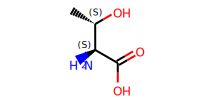

In [13]:
d2d = rdMolDraw2D.MolDraw2DSVG(200,100)
d2d.drawOptions().addStereoAnnotation=True
d2d.drawOptions().fixedBondLength=30

d2d.DrawMolecule(l_allothreonine)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

If I increase the size of the drawing surface but keep the same `fixedBondLength` value, the molecule is drawn the same size:

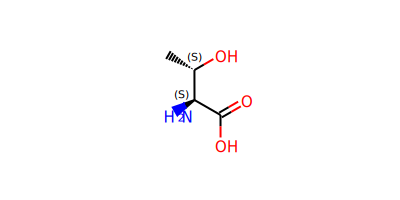

In [14]:
d2d = rdMolDraw2D.MolDraw2DSVG(400,200)
d2d.drawOptions().addStereoAnnotation=True
d2d.drawOptions().fixedBondLength=30

d2d.DrawMolecule(l_allothreonine)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

Note that if the canvas is too small to fit the molecule, the bond size will be overridden.

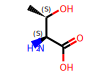

In [15]:
d2d = rdMolDraw2D.MolDraw2DSVG(100,75)
d2d.drawOptions().addStereoAnnotation=True
d2d.drawOptions().fixedBondLength=30

d2d.DrawMolecule(l_allothreonine)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

### What about enhanced stereo?

To display enhanced stereo information we currently need to use an extra function that adds the atom annotations:

In [16]:
def addEnhancedStereoAnnotations(m):
    gpLookup = {Chem.StereoGroupType.STEREO_OR:"or",
                Chem.StereoGroupType.STEREO_AND:"&",
                Chem.StereoGroupType.STEREO_ABSOLUTE:"abs",
               }
    sgs = m.GetStereoGroups()
    for i,sg in enumerate(sgs):
        typ = gpLookup[sg.GetGroupType()]
        for at in sg.GetAtoms():
            nt = ""
            if at.HasProp("atomNote"):
                nt += at.GetProp("atomNote")+","
            nt += f"{typ}{i+1}"
            at.SetProp("atomNote",nt)

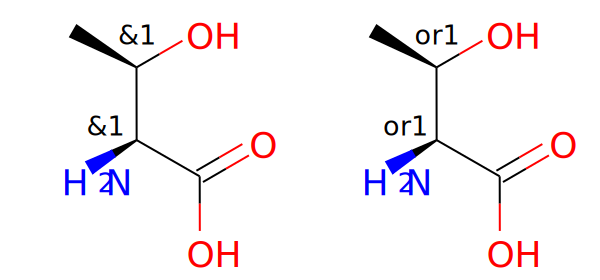

In [17]:
threonine_and = Chem.MolFromSmiles('C[C@@H](O)[C@H](N)C(O)=O |&1:1,3|')
threonine_or = Chem.MolFromSmiles('C[C@@H](O)[C@H](N)C(O)=O |o1:1,3|')
addEnhancedStereoAnnotations(threonine_and)
addEnhancedStereoAnnotations(threonine_or)
d2d = rdMolDraw2D.MolDraw2DSVG(600,280,300,280)
d2d.DrawMolecules([threonine_and,threonine_or])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

It should be easier to get this information displayed, so we'll add a new drawing option for that in the next release.

## Advanced highlighting

Let's highlight pharmacophore features on a molecule. The tricky bit here is that one atom can be in multiple features. Fortunately there is new code to support this.

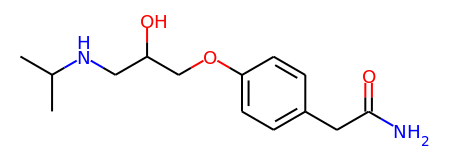

In [18]:
atenolol = Chem.MolFromSmiles('CC(C)NCC(O)COc1ccc(CC(N)=O)cc1')
atenolol

It's worth pointing out how much nicer this drawing looks than it used to since the H is now above the amine N (instead of next to it).

Start by getting the feature factory that we'll use to find the chemical features.

The default feature definition file that the RDKit includes isn't so great, but fortunately some years ago Markus Kossner contributed a better one that lives in the Contrib directory. We'll use that

In [19]:
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import requests
# grab a feature definition file from the RDKit's contrib dir in github:
res = requests.get('https://raw.githubusercontent.com/rdkit/rdkit/master/Contrib/M_Kossner/BaseFeatures_DIP2_NoMicrospecies.fdef')
fdef = res.text
ffact = ChemicalFeatures.BuildFeatureFactoryFromString(fdef)


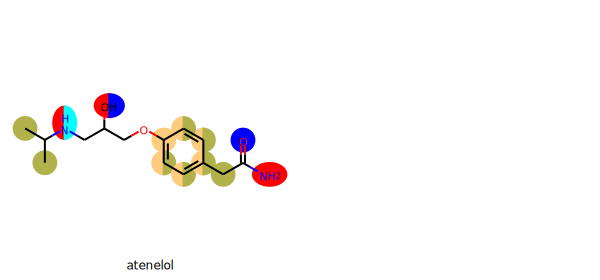

In [20]:
from collections import defaultdict
feats = ffact.GetFeaturesForMol(atenolol)
colors = {'SingleAtomDonor':(1,0,0),
          'SingleAtomAcceptor':(0,0,1),
          'BasicGroup':(0,1,1),
          'Arom6':(1,0.8,0.5),
          'Hphobe':(0.7,0.7,0.3)}
atomHighlights = defaultdict(list)
highlightRads = {}
for feat in feats:
    if feat.GetType() in colors:
        clr = colors[feat.GetType()]
        for aid in feat.GetAtomIds():
            atomHighlights[aid].append(clr)
            highlightRads[aid] = 0.5

d2d = rdMolDraw2D.MolDraw2DSVG(600,280,300,280)
d2d.DrawMoleculeWithHighlights(atenolol,"atenelol",dict(atomHighlights),{},highlightRads,{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

The atom highlights that we add are drawng as ellipses so that they can cover the full atom label, but it's possible to force them to be circles. We can also draw them just as outlines:

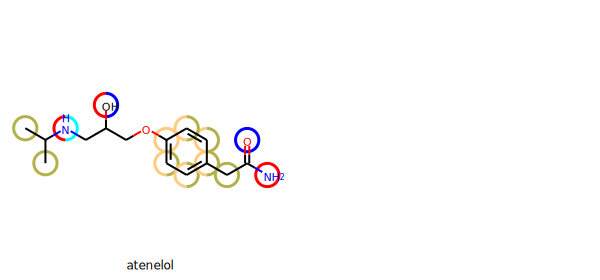

In [21]:
d2d = rdMolDraw2D.MolDraw2DSVG(600,280,300,280)
dos = d2d.drawOptions()
dos.atomHighlightsAreCircles = True
dos.fillHighlights=False
d2d.DrawMoleculeWithHighlights(atenolol,"atenelol",dict(atomHighlights),{},highlightRads,{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

We can also have multiple highlights on bonds. Here's an example showing the ring systems in a [molecule from ChEMBL](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL2314369/):

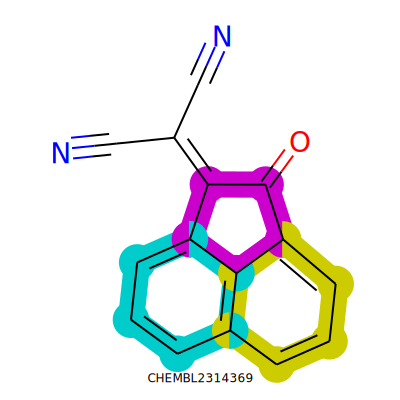

In [22]:
chembl2314369=Chem.MolFromSmiles('N#CC(C#N)=C1C(=O)c2cccc3cccc1c23')
rings = chembl2314369.GetRingInfo()

colors = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]

athighlights = defaultdict(list)
arads = {}
for i,rng in enumerate(rings.AtomRings()):
    for aid in rng:
        athighlights[aid].append(colors[i])
        arads[aid] = 0.3

bndhighlights = defaultdict(list)
for i,rng in enumerate(rings.BondRings()):
    for bid in rng:
        bndhighlights[bid].append(colors[i])
    
d2d = rdMolDraw2D.MolDraw2DSVG(400,400)
d2d.DrawMoleculeWithHighlights(chembl2314369,'CHEMBL2314369',dict(athighlights),dict(bndhighlights),arads,{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())


There are some other improvements under the hood, but this covers the major new stuff.